## Experiments with the toy graph

In [1]:
import os
# set the directory to the root of the repo
os.chdir("/Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt")

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the structural equation model for the ToyGraph


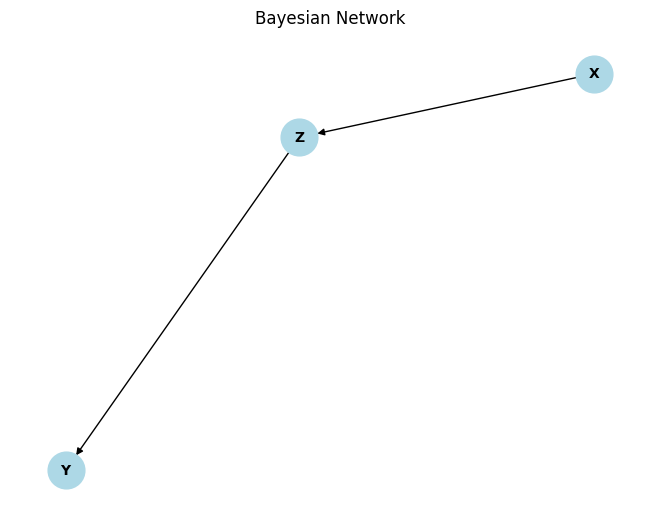

In [2]:
from utils.graph_utils.toy_graph import ToyGraph
toy_graph = ToyGraph()
toy_graph.show_graphical_model()

INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the structural equation model for the ToyGraph


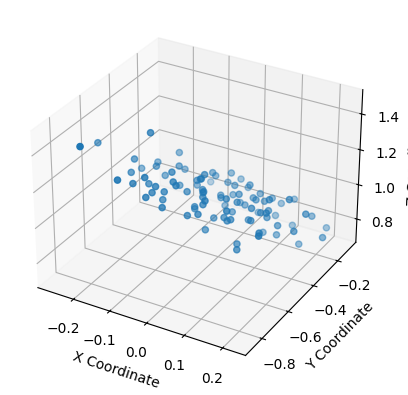

In [3]:
from utils.sem_sampling import sample_model
from utils.graph_utils.toy_graph import ToyGraph
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

graph = ToyGraph()
samples = sample_model(graph.SEM())

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(samples['X'], samples['Y'], samples['Z'])

# Adding labels
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# Display the plot
plt.show()

# Fitting the Toy Graph model

INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Fitting the Gaussian Processes based on the new data
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


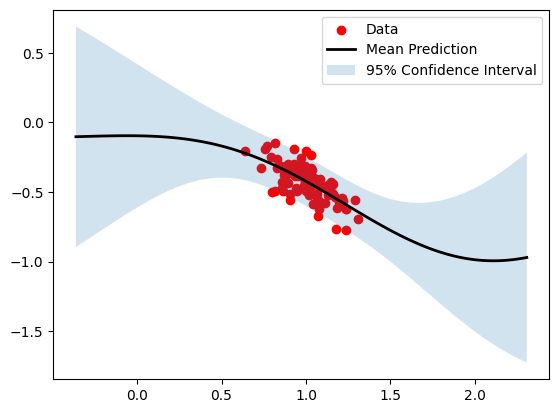

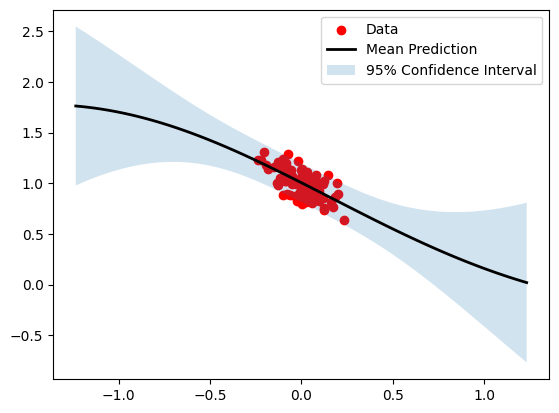

In [4]:
from utils.graph_utils.toy_graph import ToyGraph
from utils.sem_sampling import sample_model
import numpy as np
import matplotlib.pyplot as plt

graph = ToyGraph()
sample = sample_model(graph.SEM(), seed=42)
graph.refit_models(sample)

Z = sample['Z'].reshape(-1)
X_new = np.linspace(Z.min() - 1, Z.max() + 1, 100)[:, np.newaxis]
# Predicting the mean and variance for new data points
mean, variance = graph.functions['Y'].predict(X_new)
# Plot original data
plt.scatter(sample['Z'].reshape(-1), sample['Y'].reshape(-1), c='r', label='Data')
# Plot GP mean
plt.plot(X_new, mean, 'k', lw=2, zorder=9, label='Mean Prediction')
# Plot confidence interval
plt.fill_between(X_new[:, 0], mean[:, 0] - 1.96*np.sqrt(variance[:, 0]),
                    mean[:, 0] + 1.96*np.sqrt(variance[:, 0]), alpha=0.2, label='95% Confidence Interval')
plt.legend()
plt.show()


X = sample['X'].reshape(-1)
X_new = np.linspace(X.min()-1, X.max()+1, 100)[:, np.newaxis]
# Predicting the mean and variance for new data points
mean, variance = graph.functions['Z'].predict(X_new)
# Plot original data
plt.scatter(sample['X'].reshape(-1), sample['Z'].reshape(-1), c='r', label='Data')
# Plot GP mean
plt.plot(X_new, mean, 'k', lw=2, zorder=9, label='Mean Prediction')
# Plot confidence interval
plt.fill_between(X_new[:, 0], mean[:, 0] - 1.96*np.sqrt(variance[:, 0]),
                    mean[:, 0] + 1.96*np.sqrt(variance[:, 0]), alpha=0.2, label='95% Confidence Interval')
plt.legend()
plt.show()


In [5]:
do_functions = graph.get_all_do()
do_functions['compute_do_XZ'](sample, np.array([[-1, 1]]))
# print(sample)

INFO:root:Getting the do-functions for the ToyGraph


(array([[-0.4228341]]), array([[0.00820093]]))

# Drawing interventional samples

In [6]:
from algorithms.CBO_algorithm import CBO
CBO(graph_type="Toy", T=5)

INFO:root:Setting up the toy graph
INFO:root:Initializing the Toy Graph Structures
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Getting the variables (mis and pomis) for the CBO algorithm
INFO:root:Getting the inverventional range for the ToyGraph
INFO:root:Fitting the Gaussian Processes based on the new data
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Getting the inverventional range for the ToyGraph
INFO:root:Getting the inverventional range for the ToyGraph
INFO:root:Getting the inverventional range for the ToyGraph
INFO:root:Using the fixed equal cost structure
INFO:root:------ Iteration 0: Observed 1, where epsilon = 0.0016559340421934705 ------
INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Getting the do-functions for the ToyGrap

In [7]:
from algorithms.BO_algorithm import BO
BO("Toy", T=5)

INFO:root:Setting up the toy graph
INFO:root:Initializing the Toy Graph Structures


INFO:root:Setting up the structural equation model for the ToyGraph
INFO:root:Getting the variables (mis and pomis) for the CBO algorithm
INFO:root:Getting the inverventional range for the ToyGraph
INFO:root:Fitting the Gaussian Processes based on the new data
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Getting the do-functions for the ToyGraph
INFO:root:Getting the inverventional range for the ToyGraph
INFO:root:Using the Causal Gaussian Prior
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:root:Using the variable equal cost structure
INFO:root:-------- Iteration 0 --------
INFO:emukit.core.optimization.gradient_acquisition_optimizer:Starting gradient-based optimization of acquisition function <class 'emukit.bayesian_optimization.

KeyboardInterrupt: 